# **Why perform EDA?**

- Recall that EDA is performed for a variety of reasons, 
  - like detecting patterns and relationships in data, 
  - generating questions or hypotheses, 
  - or to prepare data for machine learning models.

# **Representative data**

- There's one requirement our data must satisfy regardless of our plans after performing EDA - it must be representative of the population we wish to study. 
- For example, if we collect data with the aim of analyzing the relationship between education level and income in the USA, then we would need to collect this data from adults residing in the USA, and can't rely on data from residents of France.

- Sample represents the population

For example:

- Education versus income in USA
  - Can't use data from France

# **Categorical classes**

- With categorical data, one of the most important considerations is about the representation of classes, which is another term for labels. 
- For example, say we collect data on people's attitudes to marriage. 
- As part of our data collection we find out their marital status, with the classes including single, married, and divorced.

- Classes = labels

- Survey people's attitudes towards marriage
  - Marital status
    - Single
    - Married
    - Divorce

# **Class imbalance**

- When we perform EDA we realize only 50 people were married, while 700 were divorced and the remaining 250 were single. 
- Do we think that this sample accurately represents the general public's opinion about marriage? 
- Are divorced people more likely to have a negative view towards marriage? 
- This is an example of class imbalance, where one class occurs more frequently than others. 
- This can bias results, particularly if this class does not occur more frequently in the population.

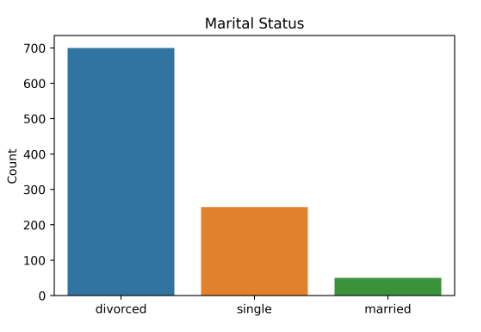

# **Class frequency**

- We've been counting the number of observations per class using pandas dot-value_counts, like here, where we see how many flights went to different destinations in our planes dataset.

In [ ]:
print(planes["Destination"].value_counts())

In [ ]:
Cochin       4391
Banglore     2773
Delhi        1219
New Delhi     888
Hyderabad     673
Kolkata       369
Name: Destination, dtype: int64

# **Relative class frequency**

- Say that we know 40 percent of internal Indian flights go to Delhi. 
- We can use value_counts method again, but this time set the normalize keyword argument equal to True. 
- This returns the relative frequencies for each class, showing that Delhi only represents 11-point-eight-two percent of destinations in our dataset. 
- Again, this could suggest that our data is not representative of the population - in this case, internal flights in India.

- 40% of internal Indian flights have a destination of Delhi

In [ ]:
planes["Destination"].value_counts(normalize=True)

In [ ]:
Cochin       0.425773
Banglore     0.268884
Delhi        0.118200
New Delhi    0.086105
Hyderabad    0.065257
Kolkata      0.035780
Name: Destination, dtype: float64

- Is our sample representative of the population (Indian internal flights)?

# **Cross-tabulation**

- Another method for looking at class frequency is cross-tabulation, which enables us to examine the frequency of combinations of classes. 
- Let's look at flight route frequencies. We'll start by calling pandas-dot-crosstab function.

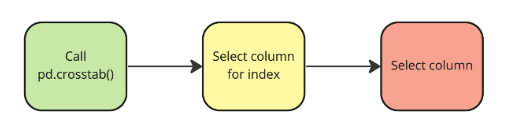

In [ ]:
pd.crosstab(planes["Source"], planes["Destination"])

- We see the most popular route is from Delhi to Cochin, making up 4318 flights.

In [ ]:
Destination   Banglore  Cochin  Delhi  Hyderabad  Kolkata  New Delhi
Source
Banglore          0       0    1199       0         0       868
Chennai           0       0       0       0       364         0
Delhi             0    4318       0       0         0         0
Kolkata        2720       0       0       0         0         0
Mumbai            0       0       0     662         0         0

# **Extending cross-tabulation**

- Say we know the median price for all internal flight routes in India. 
- Here they are for the routes in our dataset, measured in Indian Rupees. 
- We can calculate the median price for these routes in our DataFrame, and compare the difference to these expected values.

| Source | Destination | Median Price (IDR) |
|---|---|---|
| Banglore | Delhi | 4232.21 |
| Banglore | New Delhi | 12114.56 |
| Chennai | Kolkata | 3859.76 |
| Delhi | Cochin | 9987.63 |
| Kolkata | Banglore | 9654.21 |
| Mumbai | Hyderabad | 3431.97 |



# **Aggregated values with pd.crosstab()**

- We do this by adding two keyword arguments to pd-dot-crosstab. 
- We pass the Price column to the values argument, and use aggfunc to select what aggregated calculation we want to perform. 
- We can pass a summary statistic as a string, in this case setting it equal to median. 
- The results show median values for all possible routes in the dataset.

In [ ]:
pd.crosstab(planes["Source"], planes["Destination"], values=planes["Price"], aggfunc="median")

In [ ]:
Destination   Banglore   Cochin    Delhi   Hyderabad   Kolkata   New Delhi
Source
Banglore         NaN       NaN    4823.0       NaN        NaN     10976.5
Chennai          NaN       NaN       NaN       NaN     3850.0         NaN
Delhi            NaN    10262.0      NaN       NaN        NaN         NaN
Kolkata       9345.0       NaN       NaN       NaN        NaN         NaN
Mumbai           NaN       NaN       NaN    3342.0        NaN         NaN

# **Comparing sample to population**

- Comparing our prices with the expected values, most are similar. 
- However, routes from Banglore to Delhi and New Delhi are more expensive in our dataset, suggesting they aren't representative of the population.

| Source | Destination | Median Price (IDR) | Median Price (dataset) |
|---|---|---|---|
| Banglore | Delhi | 4232.21 | 4823.0 |
| Banglore | New Delhi | 12114.56 | 10976.50 |
| Chennai | Kolkata | 3859.76 | 3850.0 |
| Delhi | Cochin | 9987.63 | 10260.0 |
| Kolkata | Banglore | 9654.21 | 9345.0 |
| Mumbai | Hyderabad | 3431.97 | 3342.0 |